### Notebook 1: Initial Exploration of Avocado Data

This notebook contains the first step of this Price Elasticity Project: reading in the dataset I will need, doing any cleaning and feature analysis, and exploring any initial correlations or relationships.

Import the needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in the avocado dataset

In [59]:
avodata = pd.read_csv('data/avocado.csv', index_col = 0 )
avodata.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [60]:
avodata.tail(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


My first observation is that this is weekly price data. That is good to know. From the dataset description on Kaggle, the column descriptions are:
- Date: date of observation
- AveragePrice: the average price of a single avocado
- Total Volume: the total number of avocados sold
- 4046: the total number of avocados with PLU 4046 sold
- 4225: the total number of avocados with PLU 4225 sold
- 4770: the total number of avocados with PLU 4770 sold
- Total Bags: Number of bags the avocados were sold in
- Small Bags: Number of small bags of avocados delivered
- Large Bags: Number of large bags of avocados delivered
- XL Bags: Number of extra large bags of avocados delivered
- Type: type of avocado, either organic or conventional
- year: the year of the observation
- region: the region where the avocados were sold

In [61]:
# How big is this dataset?
avodata.shape

(18249, 13)

In [62]:
# Let's take a look at the different regions available to us:
avodata['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [63]:
# Which regions bought the most avocados?
avodata.groupby('region').sum().sort_values('Total Volume', ascending= False)[:10]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
TotalUS,445.83,5.864740e+09,2.054936e+09,2.015012e+09,1.561752e+08,1.638601e+09,1.243561e+09,3.735843e+08,21455230.54,681458
West,430.01,1.086779e+09,3.985905e+08,3.007589e+08,2.035607e+07,3.670736e+08,2.227093e+08,1.435317e+08,832634.65,681458
California,471.62,1.028982e+09,3.989670e+08,3.514914e+08,3.184105e+07,2.466822e+08,2.290977e+08,1.231194e+07,5272577.91,681458
SouthCentral,372.22,1.011280e+09,5.350414e+08,2.204500e+08,2.239579e+07,2.333924e+08,1.848155e+08,4.593684e+07,2640111.14,681458
Northeast,541.45,7.132809e+08,3.499121e+07,4.744847e+08,6.816645e+06,1.969884e+08,1.736230e+08,2.205605e+07,1309367.56,681458
Southeast,472.53,6.152384e+08,3.396871e+08,9.086044e+07,3.163231e+06,1.815276e+08,1.069033e+08,7.210761e+07,2516762.93,681458
GreatLakes,452.43,5.896425e+08,9.371701e+07,2.672577e+08,5.007597e+07,1.785756e+08,1.232875e+08,4.889564e+07,6392523.96,681458
Midsouth,474.81,5.083494e+08,1.104306e+08,2.223731e+08,1.903196e+07,1.565136e+08,1.343644e+08,2.077087e+07,1378317.13,681458
LosAngeles,411.01,5.078965e+08,2.238794e+08,1.021340e+08,1.361869e+07,1.682645e+08,1.557261e+08,8.463145e+06,4075279.95,681458


In [64]:
# I'm going to rename the columns so there are no spaces and everything is lowercase:
avodata.columns = avodata.columns.str.lower()

avodata.rename(columns={
    'total volume': 'total_volume',
    'total bags'  : 'total_bags',
    'small bags'  : 'small_bags',
    'xlarge bags' : 'xl_bags',
}, inplace=True)
avodata.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [65]:
# Let me see if there are any missing values
avodata.isna().sum()

date            0
averageprice    0
total_volume    0
4046            0
4225            0
4770            0
total_bags      0
small_bags      0
large bags      0
xl_bags         0
type            0
year            0
region          0
dtype: int64

In [ ]:
# Looks like a clean dataset

Since this is my first time modeling for price elasticity, I'm going to select one year of data, say 2015, and then model each region separately to 
understand if there are any differences in their behavior. I'll start with TotalUS consumption for now, and then it could be fun to see if the region West displays a different response to price changes. And I just want to model the conventional avocados for now, but it would be interesting to see if the modelling results for organic avocados are significantly different or not.

In [67]:
# Create the totalus_2015 dataset
totalus_2015 = avodata[(avodata['region'] == 'TotalUS') & (avodata['year'] == 2015) & (avodata['type'] == 'conventional')]
totalus_2015['date'] = pd.to_datetime(totalus_2015['date'])
totalus_2015.set_index('date', inplace = True)
totalus_2015.sort_index(inplace = True)
totalus_2015.head()

<ipython-input-67-144b36fefeee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['date'] = pd.to_datetime(totalus_2015['date'])
<ipython-input-67-144b36fefeee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015.sort_index(inplace = True)


,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region
date,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS
2015-01-25,1.04,28470310.84,12167445.03,10734652.82,768020.05,4800192.94,3978636.90,812924.73,8631.31,conventional,2015,TotalUS
2015-02-01,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS


Now to calculate the price elasticity for the weekly data.

In [69]:
#np.round(df_bike_daycount.pct_change(), decimals=2)
totalus_2015['pct_chg_quantity'] = np.round(totalus_2015['total_volume'].pct_change(), decimals=3)
totalus_2015['pct_chg_price'] = np.round(totalus_2015['averageprice'].pct_change(), decimals=3)
totalus_2015['price_eod'] = totalus_2015['pct_chg_quantity'] / totalus_2015['pct_chg_price']
totalus_2015.head(3)

<ipython-input-69-c38cafdc2130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['pct_chg_quantity'] = np.round(totalus_2015['total_volume'].pct_change(), decimals=3)
<ipython-input-69-c38cafdc2130>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['pct_chg_price'] = np.round(totalus_2015['averageprice'].pct_change(), decimals=3)
<ipython-input-69-c38cafdc2130>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,NaN,NaN,NaN
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,-0.072,0.063,-1.142857
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,-0.001,0.020,-0.050000


In [70]:
totalus_2015.tail()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,-0.099,0.031,-3.193548
2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,0.273,-0.101,-2.702970
2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,-0.026,0.045,-0.577778
2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,-0.105,0.054,-1.944444
2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,0.088,-0.031,-2.838710


I'd like to look at some initial correlations with price elasticity using Pearson Correlation before I start modeling.

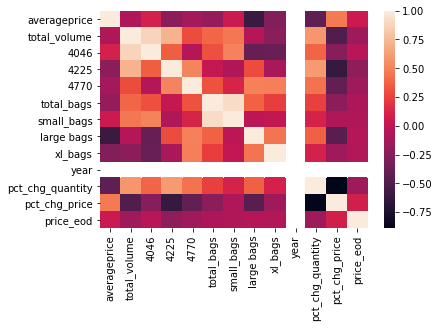

In [71]:
sns.heatmap(totalus_2015.corr())

Initial interpretations here are that the various factors are not very correlated to the price elasticity, but that the % change in price is more correlated than the % change in quantity. The other factors not correlating much make logical sense to me. Many of the other columns, like the PLU numbers and the different size of bags, are just different ways to determine quantity. None of these columns are related to information about the consumers in the Total US region. 

It is occurring to me that I should plot the price elasticity of demand over time for observational purposes.

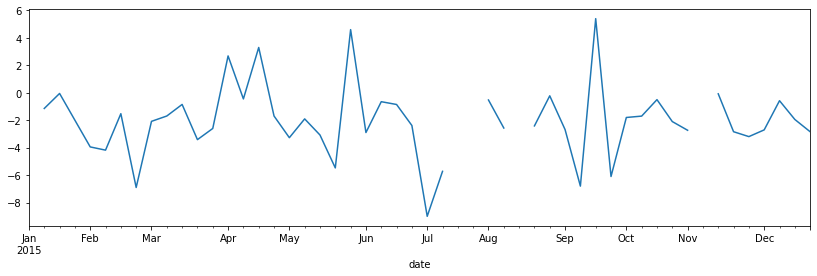

In [73]:
totalus_2015['price_eod'].plot(figsize=(14,4))